In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

In [3]:
data = pd.read_csv("telecom_users.csv")
data

,Codigo,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.20,Nao
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.50,Nao
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.50,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,...,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95.00,Sim
5982,5191,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.30,Nao
5983,5226,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,...,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao
5984,5390,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,...,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim


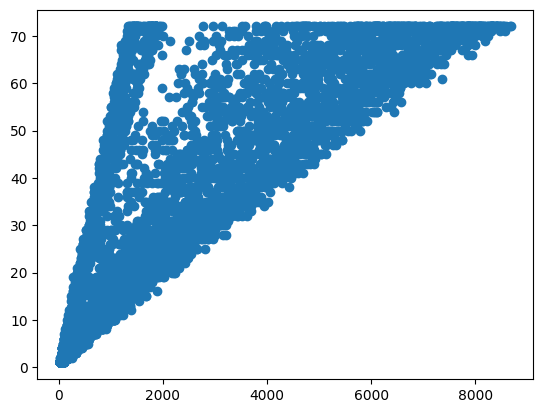

In [4]:
plt.scatter(data["TotalGasto"],data["MesesComoCliente"])
plt.show()

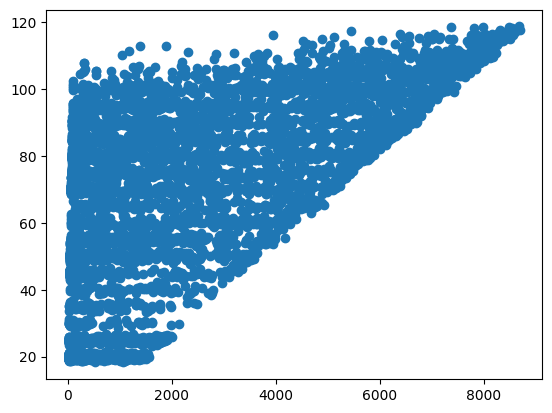

In [5]:
plt.scatter(data["TotalGasto"],data["ValorMensal"])
plt.show()

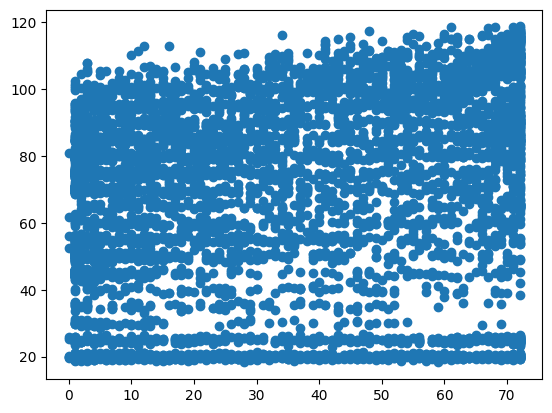

In [6]:
plt.scatter(data["MesesComoCliente"],data["ValorMensal"])
plt.show()

(array([1360.,  164.,  317.,  550.,  385.,  763.,  809.,  733.,  653.,
         252.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

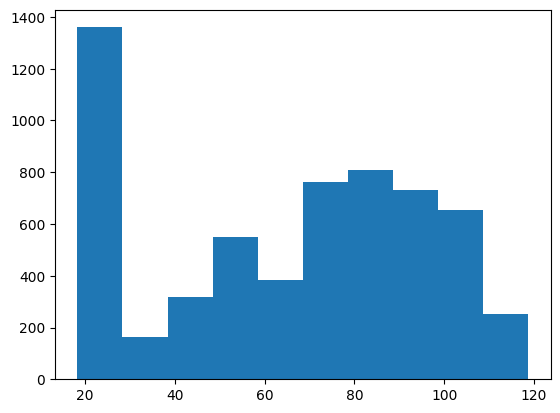

In [7]:
# Abaixo podemos perceber uma grande concentração de clientes com a mensalidade em torno de 20 reais
plt.hist(data["ValorMensal"])

(array([1357.,  640.,  490.,  471.,  428.,  424.,  384.,  419.,  437.,
         936.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

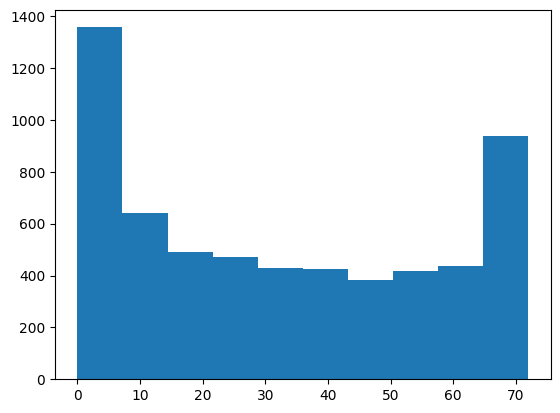

In [27]:
# Abaixo podemos perceber que a empresa consegiu manter um grupo de clientes com 70 meses
plt.hist(data["MesesComoCliente"])

In [9]:
data_corr = data[['Codigo','MesesComoCliente', 'Dependentes','TipoContrato','FormaPagamento', 'ValorMensal','TotalGasto', 'Churn']]
for linha in data_corr.index:
    # DEPENDENTES
    if data_corr.loc[linha, 'Dependentes'] == "Sim":
        data_corr.loc[linha, 'Dependentes'] = randint(20, 30)
    else:
        data_corr.loc[linha, 'Dependentes'] = randint(1, 10)
    
    # tipo contrato
    if data_corr.loc[linha, 'TipoContrato'] =="2 anos":
        data_corr.loc[linha, 'TipoContrato'] = randint(367, 400)
    elif data_corr.loc[linha, 'TipoContrato'] == "anual":
        data_corr.loc[linha, 'TipoContrato'] = randint(40, 360)
    else:
        data_corr.loc[linha, 'TipoContrato'] = randint(1, 30)
    
    # Forma de pagamento
    if data_corr.loc[linha, 'FormaPagamento'] == "CartaoCredito":
        data_corr.loc[linha, 'FormaPagamento'] = randint(1,30)
    elif data_corr.loc[linha, 'FormaPagamento'] == "DebitoAutomatico":
        data_corr.loc[linha, 'FormaPagamento'] = randint(40,70)
    elif data_corr.loc[linha, 'FormaPagamento'] ==  "BoletoEletronico":
        data_corr.loc[linha, 'FormaPagamento'] = randint(80,110)
    else:
        data_corr.loc[linha, 'FormaPagamento'] = randint(120,150)
    
    #Churn
    if data_corr.loc[linha, 'Churn'] == "Sim":
        data_corr.loc[linha, 'Churn'] = 1
    else:
        data_corr.loc[linha, 'Churn'] = 0
    

In [10]:
data_corr

,Codigo,MesesComoCliente,Dependentes,TipoContrato,FormaPagamento,ValorMensal,TotalGasto,Churn
0,1869,72,27,369,7,24.10,1734.65,0
1,4528,44,3,21,29,88.15,3973.20,0
2,6344,38,3,1,49,74.95,2869.85,1
3,6739,4,10,20,85,55.90,238.50,0
4,432,2,6,7,80,53.45,119.50,0
...,...,...,...,...,...,...,...,...
5981,3772,1,9,21,109,95.00,95.00,1
5982,5191,23,25,395,3,91.10,2198.30,0
5983,5226,12,29,23,109,21.15,306.05,0
5984,5390,12,7,28,108,99.45,1200.15,1


<AxesSubplot: xlabel='Codigo', ylabel='FormaPagamento'>

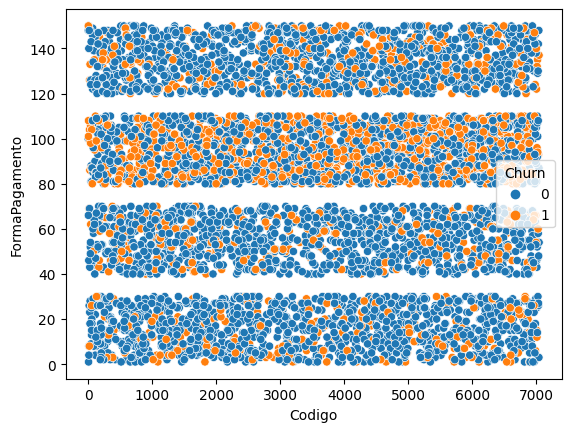

In [11]:
# Abaixo Podemos observar a correlação entre a forma de pagamento e o cancelamento do serviço
# De cima para baixo temos:
# "BoletoImpresso"
# "BoletoEletronico"
# "DebitoAutomatico"
# "CartaoCredito"
# Ou seja o clientes com forma de pagamento via boleto eletronico tiveram mais tendencia em cancelar o serviço
sns.scatterplot(x=data_corr["Codigo"], y=data_corr["FormaPagamento"], hue=data_corr["Churn"])

<AxesSubplot: xlabel='Codigo', ylabel='Dependentes'>

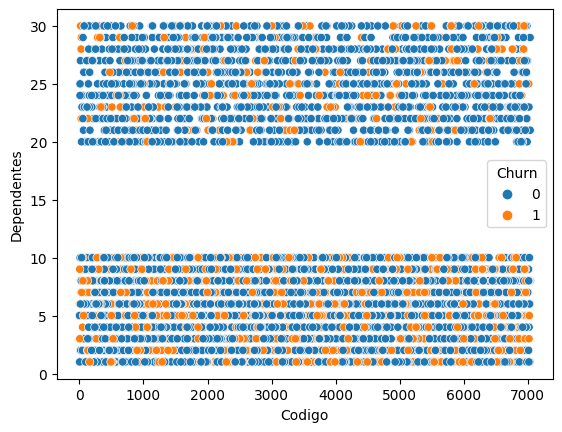

In [12]:
# Abaixo Podemos observar a correlação entre a ter dependentes e o cancelamento do serviço
# De cima para baixo temos:
# "Clientes com dependentes"
# "Clientes sem dependentes"
# Ou seja o clientes sem dependentes tiveram mais tendencia em cancelar o serviço
sns.scatterplot(x=data_corr["Codigo"], y=data_corr["Dependentes"], hue=data_corr["Churn"])

In [51]:
#Contagem de serviços
dataservico = data[['Codigo','MesesComoCliente', 'ServicoTelefone', 'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline', 'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV', 'ServicoFilmes']]
servicosContratados = []

for linha in dataservico.index:
    cont = 0
    ncont = 0
    #Servico Telefone
    if dataservico.loc[linha, 'ServicoTelefone'] == "Nao":
       ncont = ncont + 1
    else:
        cont = cont +1
    
    #Servico Intenet
    if dataservico.loc[linha, 'ServicoInternet'] == "Nao":
       ncont = ncont + 1
    else:
        cont = cont +1

    #Servico Seguranca Online
    if dataservico.loc[linha, 'ServicoSegurancaOnline'] == "Nao" or "SemIntenet":
       ncont = ncont + 1
    else:
        cont = cont +1

    #Servico Backup Online
    if dataservico.loc[linha, 'ServicoBackupOnline'] == "Nao" or "SemIntenet":
       ncont = ncont + 1
    else:
        cont = cont +1
    
    #Protecao Equipamento
    if dataservico.loc[linha, 'ProtecaoEquipamento'] == "Nao" or "SemIntenet":
       ncont = ncont + 1
    else:
        cont = cont +1

    #Servico Suporte Tecnico
    if dataservico.loc[linha, 'ServicoSuporteTecnico'] == "Nao" or "SemIntenet":
       ncont = ncont + 1
    else:
        cont = cont +1

    #Servico Streaming TV
    if dataservico.loc[linha, 'ServicoStreamingTV'] == "Nao" or "SemIntenet":
        ncont = ncont + 1
    else:
        cont = cont +1
    
    #Servico Filmes
    if dataservico.loc[linha, 'ServicoFilmes'] == "Nao" or "SemInternet":
       ncont = ncont + 1
    else:
        cont = cont + 1

    servicosContratados.append(cont)
servicosContratados

[1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,


In [31]:
dataservico['ServicosContratados'] = servicosContratados
dataservico

C:\Users\rodri\AppData\Local\Temp\ipykernel_69212\3149935648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataservico['ServicosContratados'] = servicosContratados


,Codigo,MesesComoCliente,ServicoTelefone,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,ServicosContratados
0,1869,72,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,1
1,4528,44,Sim,Fibra,Nao,Sim,Sim,Nao,Sim,Nao,2
2,6344,38,Sim,Fibra,Nao,Nao,Nao,Nao,Nao,Nao,2
3,6739,4,Sim,DSL,Nao,Nao,Nao,Nao,Nao,Sim,2
4,432,2,Sim,DSL,Sim,Nao,Sim,Nao,Nao,Nao,2
...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,1,Sim,Fibra,Sim,Nao,Nao,Nao,Sim,Sim,2
5982,5191,23,Sim,DSL,Sim,Sim,Sim,Sim,Sim,Sim,2
5983,5226,12,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,1
5984,5390,12,Sim,Fibra,Nao,Nao,Sim,Nao,Sim,Sim,2


<AxesSubplot: xlabel='MesesComoCliente', ylabel='ServicosContratados'>

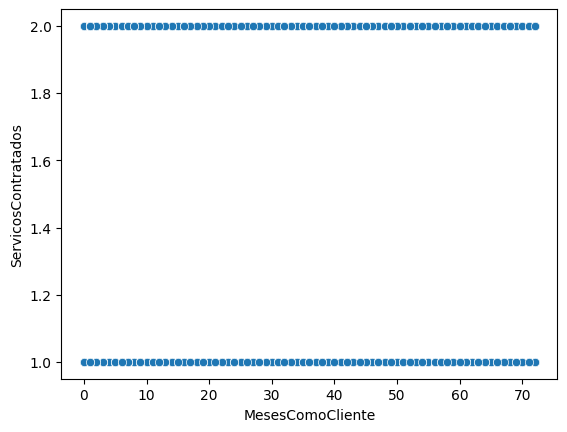

In [30]:
sns.scatterplot(x=dataservico["MesesComoCliente"], y=dataservico["ServicosContratados"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ServicosContratados'>

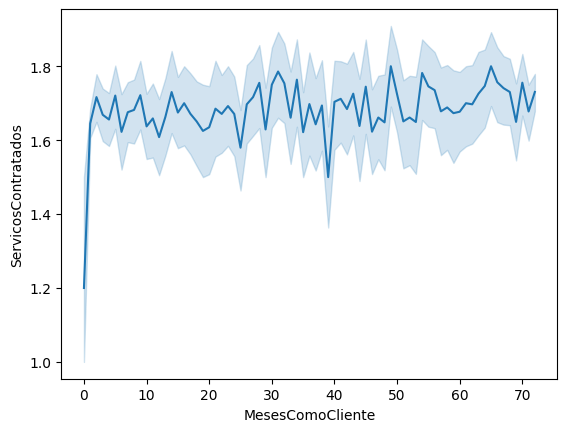

In [26]:
tempoxServico = dataservico[['MesesComoCliente', 'ServicosContratados']]
sns.lineplot(x= tempoxServico['MesesComoCliente'], y= tempoxServico['ServicosContratados'])